# AI - CA4
## Mahsa Massoud - 810098032

In this project we are going to predict price of cars from the DIVAR dataset. we use some basic methods of machine learning in order to do that like KNN, Linear Regression , Decision Tree and Random forest.

In [99]:
import pandas as pd
import numpy as np
import hazm
import math
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("vehicles.csv")

first we import all necessary libraries and functions

In [2]:
df.head(10)


,brand,category,created_at,description,image_count,mileage,price,title,year
0,NaN,heavy,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,4,NaN,-1,لودر کاتر پیلار 950,NaN
1,سایر,light,Wednesday 04AM,دوگانه ال پی جی بیمه با تخفیف دارد \nتودوزی نو...,3,180000.0,-1,پاترول شش سیلندر چهار درب,1366
2,پژو ۴۰۵::Peugeot 405,light,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.0,8500000,پژو مدل 81 مشکی,1381
3,نیسان::Nissan,light,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,3,175000.0,19500000,پاترول 2در,1372
4,سمند::Samand,light,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.0,23900000,سمند دوگانه کارخانه,1391
5,پژو ۴۰۵::Peugeot 405,light,Thursday 08AM,بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم,3,125000.0,8500000,پژو405 مدل84,1384
6,ام‌وی‌ام::MVM,light,Thursday 08AM,ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...,2,11000.0,18500000,ام وی ام 110 چهار سیلندر,1393
7,پراید صندوق‌دار::Pride,light,Thursday 09AM,یک پراید مدل 87خونگی بدون رنگ سفید هفت سال تخف...,1,200000.0,11000000,پرایدصبامدل87خونگی فابریک,1387
8,پراید هاچ‌بک::Pride,light,Friday 04AM,مدل 80 رنگ سفید بیمه تا برج ۱۱ فنی سالم رینگ ...,3,1.0,7800000,پراید هاچ بک مدل 80,1380
9,سایر,light,Friday 12PM,در حد_ بسیار تمیز_ سرویس گارانتی انجام شده_ ما...,1,17000.0,45000000,جک جی ۵ دنده ای,1393


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   brand        120451 non-null  object 
 1   category     130443 non-null  object 
 2   created_at   130443 non-null  object 
 3   description  130443 non-null  object 
 4   image_count  130443 non-null  int64  
 5   mileage      120451 non-null  float64
 6   price        130443 non-null  int64  
 7   title        130443 non-null  object 
 8   year         120451 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 9.0+ MB


In [4]:
df.describe()


,image_count,mileage,price
count,130443.000000,120451.000000,1.304430e+05
mean,1.865527,100862.291944,2.224718e+07
std,1.471163,98368.470916,3.079805e+07
min,0.000000,0.000000,-1.000000e+00
25%,0.000000,19000.000000,7.400000e+06
50%,2.000000,75000.000000,1.450000e+07
75%,3.000000,160000.000000,2.500000e+07
max,14.000000,500000.000000,4.000000e+08


In [5]:
df.isnull().sum()


brand          9992
category          0
created_at        0
description       0
image_count       0
mileage        9992
price             0
title             0
year           9992
dtype: int64

we eliminate dummy words and signs with the help of hazm stopwords and more added signes. Also we enlist the helping hand of lameetizing, Normalizing and word tokenizing.

In [6]:
import hazm
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def preprocessTextofColumn(columnName , dataframe):
    normalizer = hazm.Normalizer()
    tokenizer = hazm.WordTokenizer()
    lemmatizer = hazm.Lemmatizer()
    StopWords = set(hazm.utils.stopwords_list())
    StopWords = StopWords.union({'ك','ي','آ','ا','ب','پ','ت','ث','ج','چ','ح','خ','د','ذ','ر','ز','ژ','س','ش','ص','ض','ط','ظ','ع','غ','ف','ق','ک','گ','ل','م','ن','و','ه','ی',})
    StopWords = StopWords.union({'کتاب','داستان', 'زندگی','توانستن#توان' ,'کرد#کن' , '؟',':','...', '....' , 'ی','ای',',','،','(',')',':',';','-','_','.','/','+','=','?','\r','\n' ,'[',']' ,'؛' , '«', '»','…', '"' ,'!','#'})
    commons ={'سر','شد#شو','کتاب','داستان', 'زندگی', 'کرد#کن' , '؟' , 'توانست#توان',  'خواند#خوان' ,'زد#زن' ,'گفت#گو', 'جلد','داشت#دار' , 'رفت#رو'}
    allWords = []
    for i in range(dataframe.shape[0]):
        text = dataframe.loc[i][columnName] + ' ' + dataframe.loc[i]['description']
        normalizedText = normalizer.affix_spacing(text)
        words = tokenizer.tokenize(normalizedText)
        filteredWords = []
        for word in words:
            lamm = lemmatizer.lemmatize(word.lower())
            if (word.isnumeric() == False) and(word not in StopWords) and (word not in commons) and (lamm not in StopWords) and (lamm not in commons) :
                filteredWords.append(lamm)
        allWords.append(filteredWords)
    newColumnName = 'Words_'+columnName
    dataframe[newColumnName] = allWords
    
    
    return dataframe

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
df = df.replace({'price': -1}, np.nan)


In [103]:
new_df = preprocessTextofColumn('title' , df)

In [104]:
new_df

,brand,category,created_at,description,image_count,mileage,price,title,year,Words_title
0,NaN,heavy,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,4,NaN,NaN,لودر کاتر پیلار 950,NaN,"[لودر, کاتر, پیلار, سریال, j$numبدون, شکستگی, ..."
1,سایر,light,Wednesday 04AM,دوگانه ال پی جی بیمه با تخفیف دارد \nتودوزی نو...,3,180000.0,NaN,پاترول شش سیلندر چهار درب,1366,"[پاترول, سیلندر, درب, دوگانه, ال, جی, بیمه, تخ..."
2,پژو ۴۰۵::Peugeot 405,light,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.0,8500000.0,پژو مدل 81 مشکی,1381,"[پژو, مدل, مشک, پژو, فن, تازه, تعمیر, بدنه, خط..."
3,نیسان::Nissan,light,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,3,175000.0,19500000.0,پاترول 2در,1372,"[پاترول, 2در, سلام, ماشین, سالم, چی, فابریک, م..."
4,سمند::Samand,light,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.0,23900000.0,سمند دوگانه کارخانه,1391,"[سمند, دوگانه, کارخانه, سمند, ال, ایکس, رنگ, س..."
...,...,...,...,...,...,...,...,...,...,...
130438,NaN,heavy,Wednesday 03PM,بادسان فوق بیرنگ سفید رنگ بیمه تابرج 3.96 تخفی...,2,NaN,48000000.0,بادسان 8b14 مدل83,NaN,"[بادسان, 8b, مدل, بادسان, بیرنگ, سفید, رنگ, بی..."
130439,NaN,heavy,Wednesday 06PM,باسلام .تراکتورازصفری دست خودم بوده.سالم.ودارا...,4,NaN,NaN,تراکتورگلدونی ۲۳۸ایتالیا,NaN,"[تراکتورگلدونی, ایتالیا, باسلام, تراکتورازصفری..."
130440,سمند::Samand,light,Wednesday 06PM,ماشینم تصادفیه با خریدار توافق میکنم سر قیمتش,3,20000.0,NaN,خودرو سمند تصادفی مدل92,1392,"[خودرو, سمند, تصادف, مدل, ماشین, تصادفیه, خرید..."
130441,پراید صندوق‌دار::Pride,light,Thursday 03PM,سند۲ برگ،بیمه تا برج$NUMتخفیفات بیمه 15 سال،مع...,4,123000.0,6900000.0,پراید 79 بسیار سالم,1379,"[پراید, سالم, سند۲, برگ, بیمه, برج$numتخفیفات,..."


In [105]:
new_df.isnull().sum()

brand           9992
category           0
created_at         0
description        0
image_count        0
mileage         9992
price          20389
title              0
year            9992
Words_title        0
dtype: int64

In [106]:
new_df = new_df.replace({'year': '<1366'}, '1365')
new_df['year'] = pd.to_numeric(new_df['year'],downcast='float')

In [107]:
new_df['mileage'].fillna(new_df['mileage'].mean(), inplace=True)

In [108]:
categorized_df = pd.get_dummies(new_df, columns=['brand', 'category'])
data = new_df

In [14]:
categorized_df

,created_at,description,image_count,mileage,price,title,year,Words_title,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,...,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,category_heavy,category_light
0,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,4,100862.291944,NaN,لودر کاتر پیلار 950,NaN,"[لودر, کاتر, پیلار, سریال, j$numبدون, شکستگی, ...",0,0,...,0,0,0,0,0,0,0,0,1,0
1,Wednesday 04AM,دوگانه ال پی جی بیمه با تخفیف دارد \nتودوزی نو...,3,180000.000000,NaN,پاترول شش سیلندر چهار درب,1366.0,"[پاترول, سیلندر, درب, دوگانه, ال, جی, بیمه, تخ...",0,0,...,0,0,0,0,0,0,0,0,0,1
2,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.000000,8500000.0,پژو مدل 81 مشکی,1381.0,"[پژو, مدل, مشک, پژو, فن, تازه, تعمیر, بدنه, خط...",0,0,...,0,0,0,0,0,1,0,0,0,1
3,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,3,175000.000000,19500000.0,پاترول 2در,1372.0,"[پاترول, 2در, سلام, ماشین, سالم, چی, فابریک, م...",0,0,...,0,0,0,0,0,0,0,0,0,1
4,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.000000,23900000.0,سمند دوگانه کارخانه,1391.0,"[سمند, دوگانه, کارخانه, سمند, ال, ایکس, رنگ, س...",0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,Wednesday 03PM,بادسان فوق بیرنگ سفید رنگ بیمه تابرج 3.96 تخفی...,2,100862.291944,48000000.0,بادسان 8b14 مدل83,NaN,"[بادسان, 8b, مدل, بادسان, بیرنگ, سفید, رنگ, بی...",0,0,...,0,0,0,0,0,0,0,0,1,0
130439,Wednesday 06PM,باسلام .تراکتورازصفری دست خودم بوده.سالم.ودارا...,4,100862.291944,NaN,تراکتورگلدونی ۲۳۸ایتالیا,NaN,"[تراکتورگلدونی, ایتالیا, باسلام, تراکتورازصفری...",0,0,...,0,0,0,0,0,0,0,0,1,0
130440,Wednesday 06PM,ماشینم تصادفیه با خریدار توافق میکنم سر قیمتش,3,20000.000000,NaN,خودرو سمند تصادفی مدل92,1392.0,"[خودرو, سمند, تصادف, مدل, ماشین, تصادفیه, خرید...",0,0,...,0,0,0,0,0,0,0,0,0,1
130441,Thursday 03PM,سند۲ برگ،بیمه تا برج$NUMتخفیفات بیمه 15 سال،مع...,4,123000.000000,6900000.0,پراید 79 بسیار سالم,1379.0,"[پراید, سالم, سند۲, برگ, بیمه, برج$numتخفیفات,...",0,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
data = data[data.price.isnull()== False]
new_df = categorized_df[categorized_df.price.isnull()== False]
new_df

,created_at,description,image_count,mileage,price,title,year,Words_title,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,...,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,category_heavy,category_light
2,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.000000,8500000.0,پژو مدل 81 مشکی,1381.0,"[پژو, مدل, مشک, پژو, فن, تازه, تعمیر, بدنه, خط...",0,0,...,0,0,0,0,0,1,0,0,0,1
3,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,3,175000.000000,19500000.0,پاترول 2در,1372.0,"[پاترول, 2در, سلام, ماشین, سالم, چی, فابریک, م...",0,0,...,0,0,0,0,0,0,0,0,0,1
4,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.000000,23900000.0,سمند دوگانه کارخانه,1391.0,"[سمند, دوگانه, کارخانه, سمند, ال, ایکس, رنگ, س...",0,0,...,0,0,0,0,0,0,0,0,0,1
5,Thursday 08AM,بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم,3,125000.000000,8500000.0,پژو405 مدل84,1384.0,"[پژو, مدل, بیمه, یکسال, ده, سال, تخفیف, رنگ, ش...",0,0,...,0,0,0,0,0,1,0,0,0,1
6,Thursday 08AM,ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...,2,11000.000000,18500000.0,ام وی ام 110 چهار سیلندر,1393.0,"[ام, ام, سیلندر, ام, ام, سیلندر, مدل, فن, سالم...",1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130435,Tuesday 02PM,فوق‌العاده سالم بدون رنگ دزدگیر ماجیکار شیشه ه...,2,173000.000000,30000000.0,ال۹۰ E2,1390.0,"[ال, e2, فوق‌العاده, سالم, رنگ, دزدگیر, ماجیکا...",0,0,...,0,0,0,0,0,0,0,0,0,1
130436,Tuesday 05PM,مدل 84 تمیز. بدون رنگ. سیستم صوتی. رینگ و لاست...,3,140000.000000,11000000.0,پراید مدل 84 بدون رنگ,1384.0,"[پراید, مدل, رنگ, مدل, تمیز, رنگ, سیستم, صوت, ...",0,0,...,0,0,0,0,0,0,0,0,0,1
130438,Wednesday 03PM,بادسان فوق بیرنگ سفید رنگ بیمه تابرج 3.96 تخفی...,2,100862.291944,48000000.0,بادسان 8b14 مدل83,NaN,"[بادسان, 8b, مدل, بادسان, بیرنگ, سفید, رنگ, بی...",0,0,...,0,0,0,0,0,0,0,0,1,0
130441,Thursday 03PM,سند۲ برگ،بیمه تا برج$NUMتخفیفات بیمه 15 سال،مع...,4,123000.000000,6900000.0,پراید 79 بسیار سالم,1379.0,"[پراید, سالم, سند۲, برگ, بیمه, برج$numتخفیفات,...",0,0,...,0,0,0,0,0,0,0,0,0,1


In [110]:
data = data[data.year.isnull()== False]
new_df = new_df[new_df.year.isnull()== False]
new_df.isnull().sum()

created_at                               0
description                              0
image_count                              0
mileage                                  0
price                                    0
title                                    0
year                                     0
Words_title                              0
brand_ام‌وی‌ام::MVM                      0
brand_بنز::Mercedes-Benz                 0
brand_بی‌ام‌و::BMW                       0
brand_تندر ۹۰::Tondar 90                 0
brand_تویوتا::Toyota                     0
brand_تیبا::Tiba                         0
brand_دوو::Daewoo                        0
brand_رانا::Runna                        0
brand_رنو::Renault                       0
brand_زانتیا::Citroen Xantia             0
brand_سایر                               0
brand_سمند::Samand                       0
brand_لیفان::Lifan                       0
brand_نیسان::Nissan                      0
brand_هیوندای (غیره)::Hyundai            0
brand_هیوند

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103799 entries, 2 to 130442
Data columns (total 36 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   created_at                             103799 non-null  object 
 1   description                            103799 non-null  object 
 2   image_count                            103799 non-null  int64  
 3   mileage                                103799 non-null  float64
 4   price                                  103799 non-null  float64
 5   title                                  103799 non-null  object 
 6   year                                   103799 non-null  float32
 7   Words_title                            103799 non-null  object 
 8   brand_ام‌وی‌ام::MVM                    103799 non-null  uint8  
 9   brand_بنز::Mercedes-Benz               103799 non-null  uint8  
 10  brand_بی‌ام‌و::BMW                     103799 non-null  

In [111]:
data = data.drop(columns=["created_at"])
new_df = new_df.drop(columns=["created_at"])
new_df

,description,image_count,mileage,price,title,year,Words_title,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,...,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,category_heavy,category_light
2,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.0,8500000.0,پژو مدل 81 مشکی,1381.0,"[پژو, مدل, مشک, پژو, فن, تازه, تعمیر, بدنه, خط...",0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,3,175000.0,19500000.0,پاترول 2در,1372.0,"[پاترول, 2در, سلام, ماشین, سالم, چی, فابریک, م...",0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.0,23900000.0,سمند دوگانه کارخانه,1391.0,"[سمند, دوگانه, کارخانه, سمند, ال, ایکس, رنگ, س...",0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم,3,125000.0,8500000.0,پژو405 مدل84,1384.0,"[پژو, مدل, بیمه, یکسال, ده, سال, تخفیف, رنگ, ش...",0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...,2,11000.0,18500000.0,ام وی ام 110 چهار سیلندر,1393.0,"[ام, ام, سیلندر, ام, ام, سیلندر, مدل, فن, سالم...",1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130433,پژو GLX تاکسی گردشی مدل ۱۳۹۰ بسیار کم کارکرد\...,1,120000.0,25900000.0,پژو 405 GLX تاکسی گردشی,1390.0,"[پژو, glx, تاکسی, گردش, پژو, glx, تاکسی, گردش,...",0,0,0,...,0,0,0,0,0,1,0,0,0,1
130435,فوق‌العاده سالم بدون رنگ دزدگیر ماجیکار شیشه ه...,2,173000.0,30000000.0,ال۹۰ E2,1390.0,"[ال, e2, فوق‌العاده, سالم, رنگ, دزدگیر, ماجیکا...",0,0,0,...,0,0,0,0,0,0,0,0,0,1
130436,مدل 84 تمیز. بدون رنگ. سیستم صوتی. رینگ و لاست...,3,140000.0,11000000.0,پراید مدل 84 بدون رنگ,1384.0,"[پراید, مدل, رنگ, مدل, تمیز, رنگ, سیستم, صوت, ...",0,0,0,...,0,0,0,0,0,0,0,0,0,1
130441,سند۲ برگ،بیمه تا برج$NUMتخفیفات بیمه 15 سال،مع...,4,123000.0,6900000.0,پراید 79 بسیار سالم,1379.0,"[پراید, سالم, سند۲, برگ, بیمه, برج$numتخفیفات,...",0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 1 :

این نمودار میزان اطلاعاتی که هر ویژگی به ما میدهد را حساب میکند که مثلا اگر یک ویژگی برای همه ی رکورد ها یکسان باشد این هیچ اطلاعات مفیدی به ما نمیدهد و اگر به صورت رندم باشد هم ارزش اطلاعاتی کمی دارد.
هر کدام از ویژگی های عددی اصلی را میبینیم که با قیمت نهایی چه مقدار گین دارد.
از روی نمودار مشخص است که برند ماشین و سن آن ، بیشترین تاثیر را در قیمت میگذراند.

برای ستون قیمت ابتدا مقادیر -1 را به مقدار $NAN$ تبدیل کردیم و سپس حذفشان کردیم چون هیچ اطلاعاتی به ما نمی دادند.
برای $mile age$ مقدار میانگین را جایگزین کردیم چون پراکندگی داده ها زیاد نبود و برای سال هم مقادیری که از 1366 کوچکتر هستند را با 1365 جایگزین کرده و به مقدار عددی تبدیل کردیم.
ستوان $created_at$ را حذف کردیم چون جلوتر دیدیم که کمکی در classification نمی کند.


ستون برند بیشترین اطلاعات را با قیمت داشت ، ( بدست آمده از $mutual informaion$ ابتدایی)



# 2:
دو روش معرفی شده یکی این که  به هر لیبل یک عدد اختصاص بدهیم و در روش بعدی به ازای هر لیبل یک ستون در نظر میگیریم و در هر داده یکی از اطلاعات ۱ است و باقی صفر استفاده می کنیم. در اینجا برای مقادیر برند و کتگوری از $one hot encoding $از روش اول استفاده میکنیم  
برای ستون های تایتل و دسکریپشن از تابع $preprocess $ تعیین شده در ابتدا استفاده کردیم.



# 3:
در این بخش فیچر های تایتل و دیسکریپشن را با هم استخراج میکنیم و اضافه میکنیم.
در این بخش از مواردی که برای تمیز کردن با استفاده از کتابخانه هضم رایج است استفاده شده است.

We choose the 130 most frequent words in title and description inorder to use them as our features.


# 4
the two methods are replacing with mean or simply delete NAN values, for price column we delete NANs because targetless test column is not practical
 یک روش حذف کردن سطر می باشد که در این روش سطری که دارای مقادیر نان می باشد حذف می شود. مزیت این روش پایدار بودن داده ها می باشد. بدی این روش از دست رفتن داده های میسینگ می باشد ولی در صورت زیاد بودن داده ها مشکلی ایجاد نمی شود.

در روش بعدی اگر ستون داده به صورت داده های پیوسته باشد، مقدار میانگین یا میانه ستون به جای آن مقدار قرار می گیرد. خوبی این روش آن است که در داده های با سایز کوچک مناسب می باشد و باعث می شود باتوجه به محدودیت داده ها ، اطلاعات کمتر از بین روند. بدی این روش آن است که چولگی داده ها در آن وارد نمی شود و همچنین برای ستون های با متغیرهای پیوسته کاربرد دارد.

In [120]:
data2

,brand,category,image_count,mileage,year
2,پژو ۴۰۵::Peugeot 405,light,0,290000.0,1381.0
3,نیسان::Nissan,light,3,175000.0,1372.0
4,سمند::Samand,light,4,80000.0,1391.0
5,پژو ۴۰۵::Peugeot 405,light,3,125000.0,1384.0
6,ام‌وی‌ام::MVM,light,2,11000.0,1393.0
...,...,...,...,...,...
130433,پژو ۴۰۵::Peugeot 405,light,1,120000.0,1390.0
130435,تندر ۹۰::Tondar 90,light,2,173000.0,1390.0
130436,پراید صندوق‌دار::Pride,light,3,140000.0,1384.0
130441,پراید صندوق‌دار::Pride,light,4,123000.0,1379.0


brand          0.729257
year           0.555879
mileage        0.242153
image_count    0.008909
category       0.000000
dtype: float64


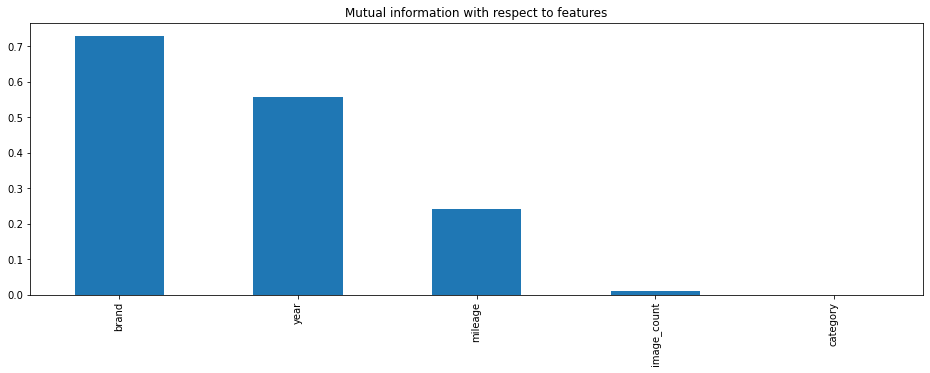

In [121]:
data2 = data.drop([ 'price', 'Words_title' , 'description' , 'title'], axis = 1) 
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
data2['brand'].fillna(data2['brand'].value_counts().idxmax(), inplace=True)
label_encoder = LabelEncoder()
data2['brand'] = data2['brand'].astype(str)
data2['brand'] = label_encoder.fit_transform((data2['brand']))

df.head()

data2['category'] = data2['category'].astype(str)
data2['category'] = label_encoder.fit_transform((data2['category']))

mi = mutual_info_regression(data2, data['price'])

mi = pd.Series(mi)
mi.index = data2.columns
mi.sort_values(ascending=False, inplace = True)
print(mi)

plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

In [19]:
df_ = new_df.drop(['price','description', 'title'] ,axis = 1) 

df_

,image_count,mileage,year,Words_title,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,...,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,category_heavy,category_light
2,0,290000.0,1381.0,"[پژو, مدل, مشک, پژو, فن, تازه, تعمیر, بدنه, خط...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,175000.0,1372.0,"[پاترول, 2در, سلام, ماشین, سالم, چی, فابریک, م...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,80000.0,1391.0,"[سمند, دوگانه, کارخانه, سمند, ال, ایکس, رنگ, س...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,125000.0,1384.0,"[پژو, مدل, بیمه, یکسال, ده, سال, تخفیف, رنگ, ش...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,2,11000.0,1393.0,"[ام, ام, سیلندر, ام, ام, سیلندر, مدل, فن, سالم...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130433,1,120000.0,1390.0,"[پژو, glx, تاکسی, گردش, پژو, glx, تاکسی, گردش,...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
130435,2,173000.0,1390.0,"[ال, e2, فوق‌العاده, سالم, رنگ, دزدگیر, ماجیکا...",0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
130436,3,140000.0,1384.0,"[پراید, مدل, رنگ, مدل, تمیز, رنگ, سیستم, صوت, ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
130441,4,123000.0,1379.0,"[پراید, سالم, سند۲, برگ, بیمه, برج$numتخفیفات,...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:

description = {}
title = {}

for words in df_['Words_title']:
    for word in words:
        if not(title.get(word)) :
            title[word] = 1
        else:
            title[word] += 1

# for words in new_df['Words_description']:
#     for word in words:
#         if not(description.get(word)) :
#             description[word] = 1
#         else:
#             description[word] += 1

title



{'پژو': 21488,
 'مدل': 47939,
 'مشک': 5448,
 'فن': 29921,
 'تازه': 8416,
 'تعمیر': 4214,
 'بدنه': 5732,
 'خطو': 442,
 'خش': 7667,
 'تخیف': 254,
 'بیمه': 72775,
 'سال': 29103,
 'لاستیک': 25931,
 'درصد': 7142,
 'یکسال': 4208,
 'پاترول': 704,
 '2در': 6,
 'سلام': 6339,
 'ماشین': 20359,
 'سالم': 46364,
 'چی': 419,
 'فابریک': 9100,
 'متور': 182,
 'ژاپن': 423,
 'لاستیکهارو': 1,
 'نو': 23415,
 'انداخت#انداز': 669,
 'دوگانه': 20622,
 'سوخت#سوز': 16,
 '#هست': 3134,
 'کولر': 1366,
 'وهیدرولیک': 23,
 'داره': 8291,
 'سمند': 7702,
 'کارخانه': 5807,
 'ال': 4706,
 'ایکس': 2139,
 'رنگ': 72107,
 'سرویس\u200cها': 1497,
 'انجام': 4121,
 '%': 2079,
 'تشکر': 3150,
 'سایت': 1343,
 'دیوار': 4954,
 'ده': 1365,
 'تخفیف': 37183,
 'شاسی': 3783,
 'پلمپ': 3005,
 'ام': 5113,
 'سیلندر': 645,
 'پرایدصبامدل': 58,
 'خونگی': 823,
 'پراید': 33930,
 'سفید': 17722,
 'هفت': 780,
 'هفتاد': 140,
 'درصددوگانه': 9,
 'ان': 1602,
 'جی': 3521,
 'دست': 5611,
 'موتور': 11941,
 'شرط': 9492,
 'وسایل': 443,
 'اچاری': 1,
 'روموتور': 1,
 

In [21]:
sort_title = sorted(title.items(), key=lambda x: x[1])
# sort_desc = sorted(description[0].items(), key=lambda x: x[1])

    

import copy
X = copy.deepcopy(new_df)

In [97]:
sort_title[-131:-1]
frequent = []
for i in range(130):
    frequent.append(sort_title[-131:-1][i][0])
len(frequent)

130

In [23]:
selected_title_words = []
for i in range(-1,-131,-1):
    selected_title_words.append(sort_title[i][0])


for words in df_['Words_title']:
    for word in words:
        if word not in selected_title_words:
            words.remove(word)
    words = np.array(np.array(words))

df_.head(10)

,image_count,mileage,year,Words_title,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,...,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,category_heavy,category_light
2,0,290000.0,1381.0,"[پژو, مدل, مشک, پژو, فن, تازه, تعمیر, بدنه, خش...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,175000.0,1372.0,"[2در, سلام, ماشین, سالم, فابریک, ژاپن, نو, دوگ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,80000.0,1391.0,"[سمند, دوگانه, کارخانه, سمند, ال, ایکس, رنگ, ا...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,125000.0,1384.0,"[پژو, مدل, بیمه, یکسال, سال, تخفیف, رنگ, شاسی,...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,2,11000.0,1393.0,"[ام, ام, ام, ام, مدل, فن, سالم, رنگ, تخفیف, بیمه]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,200000.0,1387.0,"[فابریک, پراید, مدل, خونگی, رنگ, سفید, سال, تخ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,3,1.0,1380.0,"[پراید, بک, مدل, مدل, رنگ, سفید, بیمه, برج, فن...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9,1,17000.0,1393.0,"[جی, دنده, تمیز_, گارانتی, انجام, مانیتور, عقب_]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,3,250000.0,1388.0,"[پراید, دوگانه, پرایددوگانه, فابریک, درجه, تاز...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,4,120000.0,1386.0,"[تیپ, سقف, فابریک, شاسی, راننده, لاستیک, نو, ب...",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [24]:
new_df['price']

2          8500000.0
3         19500000.0
4         23900000.0
5          8500000.0
6         18500000.0
             ...    
130433    25900000.0
130435    30000000.0
130436    11000000.0
130441     6900000.0
130442    17400000.0
Name: price, Length: 103799, dtype: float64

In [25]:
df_.isnull().sum()

image_count                              0
mileage                                  0
year                                     0
Words_title                              0
brand_ام‌وی‌ام::MVM                      0
brand_بنز::Mercedes-Benz                 0
brand_بی‌ام‌و::BMW                       0
brand_تندر ۹۰::Tondar 90                 0
brand_تویوتا::Toyota                     0
brand_تیبا::Tiba                         0
brand_دوو::Daewoo                        0
brand_رانا::Runna                        0
brand_رنو::Renault                       0
brand_زانتیا::Citroen Xantia             0
brand_سایر                               0
brand_سمند::Samand                       0
brand_لیفان::Lifan                       0
brand_نیسان::Nissan                      0
brand_هیوندای (غیره)::Hyundai            0
brand_هیوندای سوناتا::Hyundai Sonata     0
brand_وانت                               0
brand_پراید صندوق‌دار::Pride             0
brand_پراید هاچ‌بک::Pride                0
brand_پژو ر

In [41]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
df2 = df_.drop(['Words_title'], axis = 1) 

mi = mutual_info_classif(df2, new_df['price'])

year                                     0.574650
mileage                                  0.246680
brand_پراید صندوق‌دار::Pride             0.174305
category_light                           0.166480
brand_پژو پارس::Peugeot Pars             0.074318
brand_سایر                               0.068445
brand_پیکان::Peykan                      0.057209
brand_هیوندای (غیره)::Hyundai            0.051236
brand_سمند::Samand                       0.041123
brand_تیبا::Tiba                         0.039703
brand_پژو ۲۰۶‍::Peugeot 206              0.038221
brand_پژو روآ / آر‌دی::RD/ROA            0.033420
brand_پژو ۴۰۵::Peugeot 405               0.031598
brand_پراید هاچ‌بک::Pride                0.030578
brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206    0.026149
brand_تندر ۹۰::Tondar 90                 0.023128
brand_ام‌وی‌ام::MVM                      0.022665
brand_وانت                               0.018229
brand_کیا::Kia                           0.015924
image_count                              0.015400


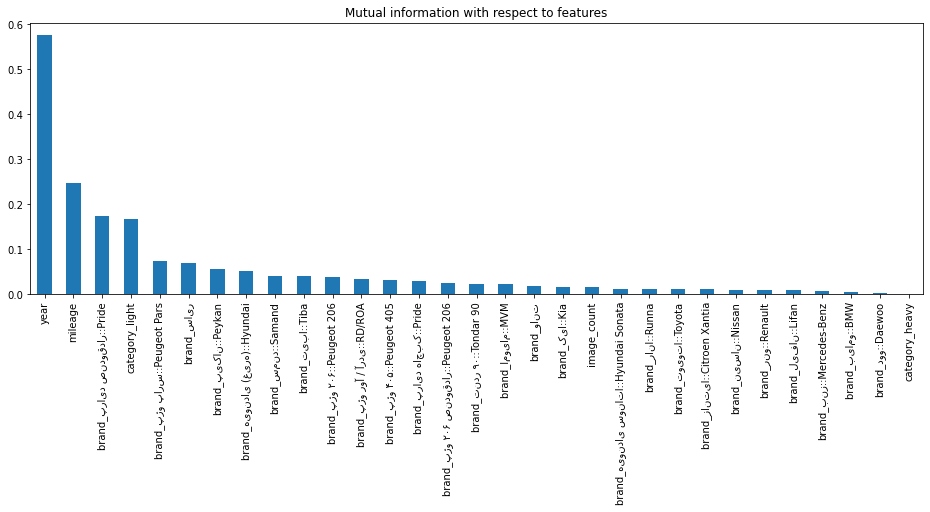

In [44]:
mi = pd.Series(mi)
mi.index = df2.columns
mi.sort_values(ascending=False, inplace = True)
print(mi)

plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

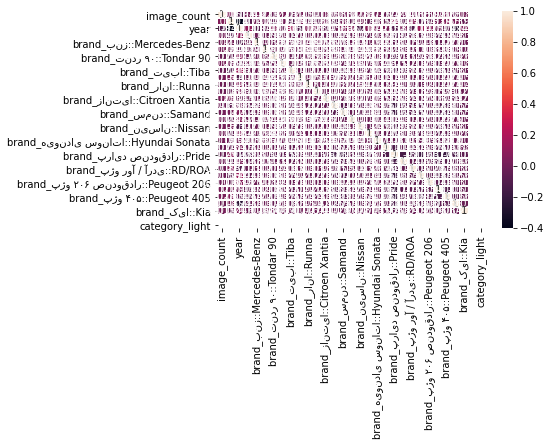

In [48]:
import seaborn as sns

fig, ax = plt.subplots()
sns.heatmap(df2.corr(), annot=True, linewidths=.5, ax=ax) 


In [27]:
def splitting(a = 0.2):
    X = df_
    y = new_df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = a, random_state = 0)

    X_mean = X_train.mean(axis = 0)
    X_std = X_train.std(axis = 0)
    X_train_normal = (X_train - X_mean) / X_std

    X_test_normal = (X_test - X_mean) / X_std

    X_train = X_train_normal
    X_test = X_test_normal
    return X_train, X_test, y_train, y_test

# errs = []
# for n_neighbors in range(1, 20):
#     print("KNN with n_neighbors : ", n_neighbors)
#     knn = KNeighborsRegressor(n_neighbors)
#     knn.fit(X_train,y_train)
#     Y_pred = knn.predict(X_test)
#     mse = mean_squared_error(y_test, Y_pred)
#     rmse = mean_squared_error(y_test, Y_pred , squared = False)
#     errs.append(rmse)
#     print("MSE : ", mse)
#     print()
#     print("RMSE : ", rmse) 
#     print()
#     print("===================================")

In [27]:
df2 = new_df.drop(['price','description', 'title'] ,axis = 1) 
df2

,image_count,mileage,year,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,brand_دوو::Daewoo,...,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,category_heavy,category_light
2,0,290000.0,1381.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,175000.0,1372.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,80000.0,1391.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,125000.0,1384.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,2,11000.0,1393.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130433,1,120000.0,1390.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
130435,2,173000.0,1390.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
130436,3,140000.0,1384.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
130441,4,123000.0,1379.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
y = new_df['price']
dff = df_
dff

,image_count,mileage,year,Words_title,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,...,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,category_heavy,category_light
2,0,290000.0,1381.0,"[پژو, مدل, مشک, پژو, فن, تازه, تعمیر, بدنه, خش...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,175000.0,1372.0,"[2در, سلام, ماشین, سالم, فابریک, ژاپن, نو, دوگ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,80000.0,1391.0,"[سمند, دوگانه, کارخانه, سمند, ال, ایکس, رنگ, ا...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,125000.0,1384.0,"[پژو, مدل, بیمه, یکسال, سال, تخفیف, رنگ, شاسی,...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,2,11000.0,1393.0,"[ام, ام, ام, ام, مدل, فن, سالم, رنگ, تخفیف, بیمه]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130433,1,120000.0,1390.0,"[پژو, تاکسی, پژو, تاکسی, مدل, کارکرد, نو, کارک...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
130435,2,173000.0,1390.0,"[ال, فوق‌العاده, سالم, رنگ, دزدگیر, شیشه, دود,...",0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
130436,3,140000.0,1384.0,"[پراید, مدل, رنگ, مدل, تمیز, رنگ, سیستم, رینگ,...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
130441,4,123000.0,1379.0,"[پراید, سالم, برگ, بیمه, بیمه, سال, معاینه, فن...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.2, random_state = 7)

In [76]:
errs = []
for n_neighbors in range(1, 20):
    print("KNN with n_neighbors : ", n_neighbors)
    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(X_train,y_train)
    Y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, Y_pred)
    rmse = mean_squared_error(y_test, Y_pred , squared = False)
    errs.append(rmse)
    print("MSE : ", mse)
    print()
    print("RMSE : ", rmse) 
    print()
    print("===================================")

KNN with n_neighbors :  1
MSE :  517639231710311.4

RMSE :  22751686.348715153

KNN with n_neighbors :  2
MSE :  465513730116634.06

RMSE :  21575767.196478415

KNN with n_neighbors :  3
MSE :  450713407213971.3

RMSE :  21230011.945686024

KNN with n_neighbors :  4
MSE :  452687047282786.25

RMSE :  21276443.482941087

KNN with n_neighbors :  5
MSE :  452745552295019.1

RMSE :  21277818.31614837

KNN with n_neighbors :  6
MSE :  458889793137456.44

RMSE :  21421713.12331151

KNN with n_neighbors :  7
MSE :  463770778558578.25

RMSE :  21535337.902122136

KNN with n_neighbors :  8
MSE :  472586926719717.44

RMSE :  21739064.53184491

KNN with n_neighbors :  9
MSE :  478376835603231.75

RMSE :  21871827.440870866

KNN with n_neighbors :  10
MSE :  482672623105805.1

RMSE :  21969811.631095182

KNN with n_neighbors :  11
MSE :  488354561906242.7

RMSE :  22098745.708891325

KNN with n_neighbors :  12
MSE :  491898559391628.2

RMSE :  22178786.247034084

KNN with n_neighbors :  13
MSE :  

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.2, random_state = 7)
linear = LinearRegression()
linear.fit(X_train,y_train)
Y_pred = linear.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
rmse = mean_squared_error(y_test, Y_pred , squared = False)
print("With 80% train size and 20% test size :")
print()
print("MSE :", mse)
print()
print("RMSE :" ,rmse)

With 80% train size and 20% test size :

MSE : 239911109811280.7

RMSE : 15489064.200631382


In [33]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.02, random_state = 7)
linear = LinearRegression()
linear.fit(X_train,y_train)
Y_pred = linear.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
rmse = mean_squared_error(y_test, Y_pred , squared = False)
print("With 98% train size and 2% test size :")
print()
print("MSE :", mse)
print()
print("RMSE :" ,rmse)

With 98% train size and 2% test size :

MSE : 255120233817463.75

RMSE : 15972483.645866217


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.6, random_state = 7)
linear = LinearRegression()
linear.fit(X_train,y_train)
Y_pred = linear.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
rmse = mean_squared_error(y_test, Y_pred , squared = False)
print("With 40% train size and 60% test size :")
print()
print("MSE :", mse)
print()
print("RMSE :" ,rmse)


With 40% train size and 60% test size :

MSE : 243187638334095.0

RMSE : 15594474.609107388


# 5:
از نسبت 20 به 80 برای تقسیم داده ها استفاده کردیم و علت هم این است که این نسبت برای اکثر داده ها قابل استفاده است و این را به تجربه می توان دید. مشاهده می شود که با  اختصاص دادن 60 درصد داده ها به تست ، خطا زیاد می شود دلیل هم کم بودن دیتای آموزش است که با اصلاح نسبت یا روش هایی مثل $Data Augmentation$ قابل حل است.
هنگامی که 2 درصد را به داده تست اختصاص می دهیم نیز خطا افزایش می یابد و این بار دلیل $overfitting $ می باشد.
مورد اول به اصطلاح $underfitting $ نام دارد

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.2, random_state = 7)
clf = tree.DecisionTreeRegressor(min_samples_split=190)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
rmse = mean_squared_error(y_test, Y_pred , squared = False)
print("Decision tree with min_sample_split of 190 : ")
print()
print("MSE :", mse)
print()
print("RMSE :" ,rmse)
print("===================================")

Decision tree with min_sample_split of 190 : 

MSE : 148532794013336.88

RMSE : 12187403.087341325


In [52]:
mse_list = []
rmse_list = []
for depth in range(1, 20):
    clf = tree.DecisionTreeRegressor(max_depth=depth)
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, Y_pred)
    rmse = mean_squared_error(y_test, Y_pred , squared = False)
    mse_list.append(mse)
    rmse_list.append(rmse)
    print("Decision tree with max_depth of : ", depth)
    print()
    print("MSE :", mse)
    print()
    print("RMSE :" ,rmse)
    print("===================================")

Decision tree with max_depth of :  1

MSE : 570109164688570.6

RMSE : 23876958.865998212
Decision tree with max_depth of :  2

MSE : 485614410180846.56

RMSE : 22036660.595036775
Decision tree with max_depth of :  3

MSE : 412418590320225.4

RMSE : 20308091.744923387
Decision tree with max_depth of :  4

MSE : 354512453376006.9

RMSE : 18828501.09212114
Decision tree with max_depth of :  5

MSE : 298764133596177.44

RMSE : 17284794.86705519
Decision tree with max_depth of :  6

MSE : 254771112259857.16

RMSE : 15961551.06059111
Decision tree with max_depth of :  7

MSE : 213790766562808.66

RMSE : 14621585.6377757
Decision tree with max_depth of :  8

MSE : 202909941112368.03

RMSE : 14244646.05079284
Decision tree with max_depth of :  9

MSE : 193870546356873.34

RMSE : 13923740.386723438
Decision tree with max_depth of :  10

MSE : 199805859599992.28

RMSE : 14135270.05755434
Decision tree with max_depth of :  11

MSE : 202489841554251.25

RMSE : 14229892.534880621
Decision tree with

# 6:
میدانیم که در این مدل دو هایپر پارامتر حداکثر عمق و تعداد درخت ها به ما کمک فراوانی میکنند. به نظر میآید هرجه تعداد درخت ها بیشتر باشد دقت بیشتری به دست میآوریم ولی زمان
بیشتری طول میکشد و احتمال بیش برازش هم بیشتر است.حال این موضوع را با حداکثر عمق جبران میکنیم و همانطور که در بخش قبلی دیدیم حداکثر عمق به ما در بالا بردن دقت کمک فراوانی میکند که مقادیر بهینه برای این دو به ترتیب 190 درخت و عمق 9 می باشد.

In [66]:
clf = tree.DecisionTreeRegressor(max_depth=9,min_samples_split=190)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
rmse = mean_squared_error(y_test, Y_pred , squared = False)
print("Decision tree with max_depth of 50 : ")
print()
print("MSE :", mse)
print()
print("RMSE :" ,rmse)
print("===================================")

Decision tree with max_depth of 50 : 

MSE : 85532794013336.88

RMSE : 9248394.131595867


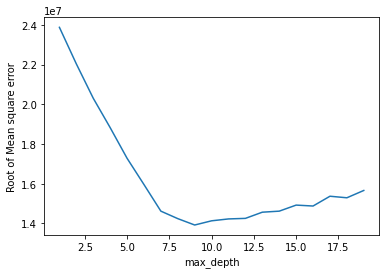

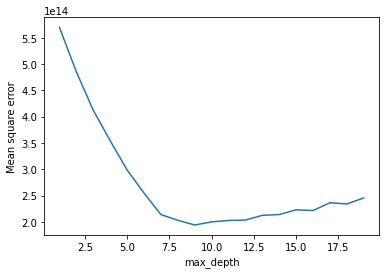

In [56]:
plt.plot(range(1, 20), rmse_list, label='RMSE changes with max_depth')

plt.xlabel("max_depth")
plt.ylabel("Root of Mean square error")
plt.show()

plt.plot(range(1, 20), mse_list, label='MSE changes with max_depth')
plt.xlabel("max_depth")
plt.ylabel("Mean square error")
plt.show()



In [68]:

mse_list = []
rmse_list = []
for i in range(1,221, 20):
    
    clf = RandomForestRegressor(n_estimators=i, max_depth=20)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    mse_list.append(MSE)
    rmse_list.append(RMSE)
    print("Max_depth=20 and number of estimators = :" , i)
    print('MSE  :', MSE)
    print('RMSE  :', RMSE)
    print("============================")

Max_depth=20 and number of estimators = : 1
MSE  : 267965710377056.47
RMSE  : 16369658.2241981
Max_depth=20 and number of estimators = : 21
MSE  : 177557991052958.84
RMSE  : 13325088.782179233
Max_depth=20 and number of estimators = : 41
MSE  : 173722229605406.53
RMSE  : 13180372.893260892
Max_depth=20 and number of estimators = : 61
MSE  : 171214529797878.97
RMSE  : 13084897.011359278
Max_depth=20 and number of estimators = : 81
MSE  : 172384882157481.44
RMSE  : 13129542.343794068
Max_depth=20 and number of estimators = : 101
MSE  : 170961858502363.78
RMSE  : 13075238.37267848
Max_depth=20 and number of estimators = : 121
MSE  : 172762055273721.97
RMSE  : 13143898.024319952
Max_depth=20 and number of estimators = : 141
MSE  : 171953523365720.3
RMSE  : 13113105.023819504
Max_depth=20 and number of estimators = : 161
MSE  : 171404883161563.8
RMSE  : 13092168.77226855
Max_depth=20 and number of estimators = : 181
MSE  : 170568543791863.38
RMSE  : 13060189.27090505
Max_depth=20 and number

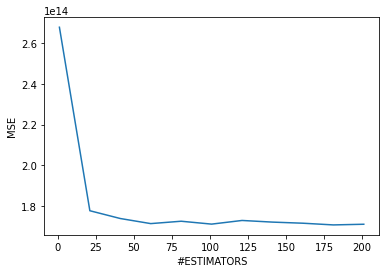

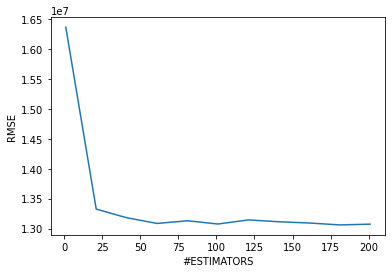

In [69]:
plt.plot(range(1, 221 , 20), mse_list, label='MSE changes with number of estimators')
plt.xlabel("#ESTIMATORS")
plt.ylabel("MSE")
plt.show()

plt.plot(range(1, 221 , 20), rmse_list, label='RMSE changes with number of estimators')
plt.xlabel("#ESTIMATORS")
plt.ylabel("RMSE")
plt.show()

number of estimators = 50 and Max_depth =  1 :
MSE  : 570182858106505.2
RMSE  : 23878502.00717175
number of estimators = 50 and Max_depth =  21 :
MSE  : 174596319876910.44
RMSE  : 13213490.071775528
number of estimators = 50 and Max_depth =  41 :
MSE  : 179886119415227.3
RMSE  : 13412163.114696573
number of estimators = 50 and Max_depth =  61 :
MSE  : 179814357723779.5
RMSE  : 13409487.601089742
number of estimators = 50 and Max_depth =  81 :
MSE  : 179919870580402.34
RMSE  : 13413421.285429096
number of estimators = 50 and Max_depth =  101 :
MSE  : 179618583487683.2
RMSE  : 13402185.772764202
number of estimators = 50 and Max_depth =  121 :
MSE  : 179358469760206.7
RMSE  : 13392478.10377925
number of estimators = 50 and Max_depth =  141 :
MSE  : 179042290629974.4
RMSE  : 13380668.541966593
number of estimators = 50 and Max_depth =  161 :
MSE  : 179971015933462.44
RMSE  : 13415327.649128158
number of estimators = 50 and Max_depth =  181 :
MSE  : 179282286472192.75
RMSE  : 13389633.5451

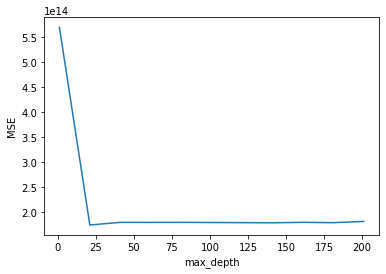

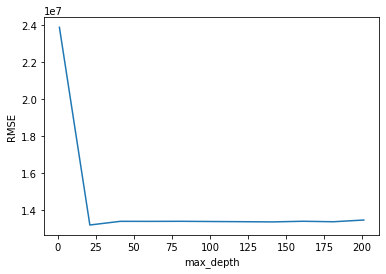

In [70]:
mse_list = []
rmse_list = []
for i in range(1,221, 20):
    
    clf = RandomForestRegressor(n_estimators=50, max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    mse_list.append(MSE)
    rmse_list.append(RMSE)
    print("number of estimators = 50 and Max_depth = " , i , ":")
    print('MSE  :', MSE)
    print('RMSE  :', RMSE)
    print("============================")

plt.plot(range(1, 221 , 20), mse_list, label='MSE changes with maximum depth')
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.show()

plt.plot(range(1, 221 , 20), rmse_list, label='RMSE changes with maximum depth')
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.show()


# 7 : 
  بایاس فاصله میانگین پیش بینی ما و مقادیر واقعی است اگر زیاد باشد به این معنی است که خوب فیت نشده و نتایج خوبی در داده تست و یادگیری نمیگیریم به نوعی شبیه به $underfitting$
     واریانس نشان دهنده پراکندگی مقادیر دیتا است. اگر زیاد باشد در واقع مدل به داده های حاشیه ای زیادی پرداخته و در واقع جنرال نیست مثل $overfitting$
در این جا این دو مدل نزدیک به هم عمل می کنند اما مدل درخت تصمیم با انتخاب پارامتر های مناسب ما را به مقدار مطلوب خطا می رساند.